# Honor Code Pledge
**By submitting your answers to this exam, you acknowledge adherence to the Honor Code Pledge**: 

**On my honor as a University of Colorado Boulder student I have neither given nor received unauthorized assistance**

# Background
We have learned:

*   Frequent Patterns
*   Classification
*   Regression
*   Clustering

We learned how to analyze data for patterns. We have played with many tutorials to learn the tools as well.

In this exam, you will be given a dataset, and you are going to apply the methods and tools to it. To receive full credits, **besides showing and explaining the result the methods, you should also explain the rational of why and how you tuned the models (why and how you chose hyperparameters)**..

**Best results will be published like a data science competition**

## Read and Understand the data (5 points)

**In this part, you should import the data, use stats and visualization tools, to get a basic understanding of it.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_record_10k.csv')

In [3]:
df.head()

,Unnamed: 0,id,major,gender,c01,c02,c03,c04,c05,c06,...,AtRisk_academic,AtRisk_campus,AtRisk_internship,AtRisk,graduate_program,goverment,industry,placement,annual,elective
0,0,0,Computer Science,M,75.757576,82.558140,72.674419,63.5,64.981949,77.880184,...,0,0,0,0,0.349878,0.367152,0.321840,1.038870,107617.807100,['Databases' 'Statistical_Inference'\n 'High_P...
1,1,1,Electric Engineering,M,81.818182,90.697674,86.627907,69.5,65.342960,76.036866,...,0,0,0,0,0.480584,0.365623,0.507846,1.354054,119352.387963,['Databases' 'Data_Mining' 'Big_Data' 'Nature_...
2,2,2,Computer Science,M,81.212121,83.139535,67.441860,61.5,67.870036,90.783410,...,0,1,0,1,0.272257,0.091891,0.275136,0.639283,79071.683763,['Text_Marketing_Analysis' 'Databases' 'Stats_...
3,3,3,Computer Science,F,82.424242,85.465116,71.511628,64.0,67.148014,90.322581,...,0,0,0,0,0.471933,0.341157,0.549235,1.362325,166007.658165,['Effective_Communication' 'Data_Structures_an...
4,4,4,Computer Science,M,86.666667,88.372093,75.581395,68.5,72.202166,88.018433,...,0,0,0,0,0.567934,0.445324,0.666711,1.679969,163059.071543,['R_for_Data_Science' 'Databases' 'Machine_Lea...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   major              10000 non-null  object 
 3   gender             10000 non-null  object 
 4   c01                10000 non-null  float64
 5   c02                10000 non-null  float64
 6   c03                10000 non-null  float64
 7   c04                10000 non-null  float64
 8   c05                10000 non-null  float64
 9   c06                10000 non-null  float64
 10  c07                10000 non-null  float64
 11  c08                10000 non-null  float64
 12  c09                10000 non-null  float64
 13  c10                10000 non-null  float64
 14  academic           10000 non-null  float64
 15  campus             10000 non-null  int64  
 16  internship         1000

# Classification (30 points)

## AtRisk (10 points)

**Use columns `'c01'`, `'c02'`, ..., `'c10'`,`'academic'`, `'campus'`, and `'internship'`, and use *Decision Tree* to classify students who need attention. The column `'AtRisk'` measures the level of attention needed, `0` stands for no need, `3` stands for a lot attention needed. As the hypterparameter training, you should set proper argument for the Decision Tree algorithm.**

In [5]:
features = ['c0{}'.format(i) for i in range(1,10)] + ['c10','academic','campus','internship']
target = ['AtRisk']
X = df[features]
y = df[target]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def create_cm(model,actual,prediction,plot_title):
    cm = confusion_matrix(actual, prediction, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)                         
    disp.plot()
    # plt.xticks(rotation=45)
    plt.title(plot_title)
    plt.show()

In [9]:
dt_pred = DTclassifier.predict(X_test)

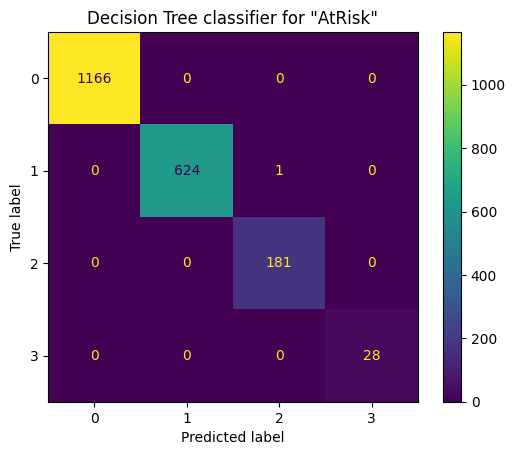

In [10]:
create_cm(DTclassifier,y_test,dt_pred,'Decision Tree classifier for "AtRisk"')

## graduate program (10 points)

**Use columns `'c01'`, `'c02'`, ..., `'c10'`,`'academic'`, `'campus'`, and `'internship'`, and use *Logistic Regression* to classify students who will continue in a graduate program. The column `'graduate_program'` indicates the likihood of the student who will continue in a graduate program. `0` means impossible, and `1` means very possible.**

In [11]:
target2 = ['graduate_program']
y2 = round(df[target2]).astype(int)

In [12]:
y2.head()

,graduate_program
0,0
1,0
2,0
3,0
4,1


In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.20)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logreg_pred = logreg.predict(X_test2)

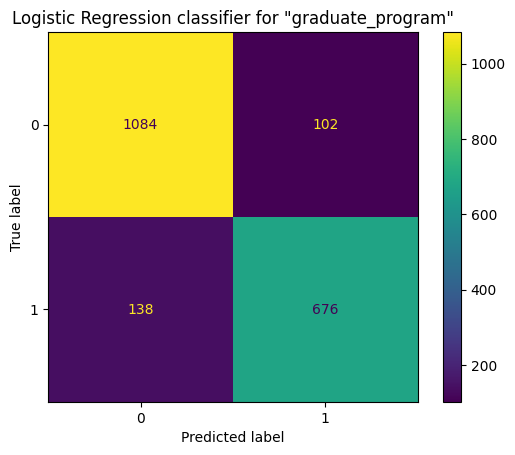

In [16]:
create_cm(logreg,y_test2,logreg_pred,'Logistic Regression classifier for "graduate_program"')

## placement (10 points)

**Use columns `'c01'`, `'c02'`, ..., `'c10'`,`'academic'`, `'campus'`, and `'internship'`, and use *A METHOD OF YOUR CHOICE* to classify students who will have a placement. The column `'placement'` measures the likelihood of students will get placements. `0` stands for no chance, and `3` means the student has high probability to get multiple placements. You should convert the value to binary: [0, 0.5) as `False`, and [0.5, 3] as `True`.**

In [17]:
conditions = [
    (df['placement'] >=0) & (df['placement'] <0.5),
    (df['placement'] >= 0.5) & (df['placement'] <= 3.0),
]

values = [False, True]

df['placement'] = np.select(conditions, values)


df.head()

,Unnamed: 0,id,major,gender,c01,c02,c03,c04,c05,c06,...,AtRisk_academic,AtRisk_campus,AtRisk_internship,AtRisk,graduate_program,goverment,industry,placement,annual,elective
0,0,0,Computer Science,M,75.757576,82.558140,72.674419,63.5,64.981949,77.880184,...,0,0,0,0,0.349878,0.367152,0.321840,1,107617.807100,['Databases' 'Statistical_Inference'\n 'High_P...
1,1,1,Electric Engineering,M,81.818182,90.697674,86.627907,69.5,65.342960,76.036866,...,0,0,0,0,0.480584,0.365623,0.507846,1,119352.387963,['Databases' 'Data_Mining' 'Big_Data' 'Nature_...
2,2,2,Computer Science,M,81.212121,83.139535,67.441860,61.5,67.870036,90.783410,...,0,1,0,1,0.272257,0.091891,0.275136,1,79071.683763,['Text_Marketing_Analysis' 'Databases' 'Stats_...
3,3,3,Computer Science,F,82.424242,85.465116,71.511628,64.0,67.148014,90.322581,...,0,0,0,0,0.471933,0.341157,0.549235,1,166007.658165,['Effective_Communication' 'Data_Structures_an...
4,4,4,Computer Science,M,86.666667,88.372093,75.581395,68.5,72.202166,88.018433,...,0,0,0,0,0.567934,0.445324,0.666711,1,163059.071543,['R_for_Data_Science' 'Databases' 'Machine_Lea...


In [18]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, df['placement'], test_size=0.20)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train3,y_train3)

RandomForestClassifier()

In [20]:
rf_pred = rf_classifier.predict(X_test3)

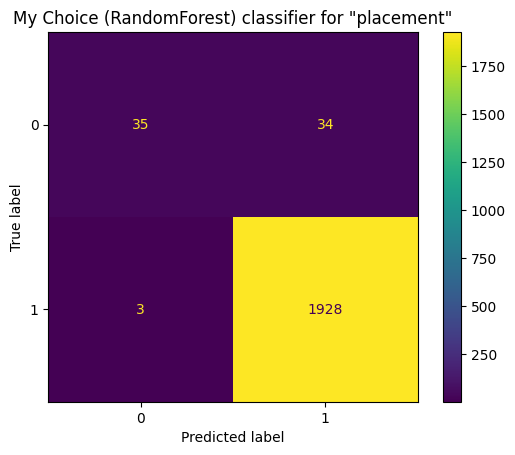

In [21]:
create_cm(rf_classifier,y_test3,rf_pred,'My Choice (RandomForest) classifier for "placement"')

In [22]:
df.head()

,Unnamed: 0,id,major,gender,c01,c02,c03,c04,c05,c06,...,AtRisk_academic,AtRisk_campus,AtRisk_internship,AtRisk,graduate_program,goverment,industry,placement,annual,elective
0,0,0,Computer Science,M,75.757576,82.558140,72.674419,63.5,64.981949,77.880184,...,0,0,0,0,0.349878,0.367152,0.321840,1,107617.807100,['Databases' 'Statistical_Inference'\n 'High_P...
1,1,1,Electric Engineering,M,81.818182,90.697674,86.627907,69.5,65.342960,76.036866,...,0,0,0,0,0.480584,0.365623,0.507846,1,119352.387963,['Databases' 'Data_Mining' 'Big_Data' 'Nature_...
2,2,2,Computer Science,M,81.212121,83.139535,67.441860,61.5,67.870036,90.783410,...,0,1,0,1,0.272257,0.091891,0.275136,1,79071.683763,['Text_Marketing_Analysis' 'Databases' 'Stats_...
3,3,3,Computer Science,F,82.424242,85.465116,71.511628,64.0,67.148014,90.322581,...,0,0,0,0,0.471933,0.341157,0.549235,1,166007.658165,['Effective_Communication' 'Data_Structures_an...
4,4,4,Computer Science,M,86.666667,88.372093,75.581395,68.5,72.202166,88.018433,...,0,0,0,0,0.567934,0.445324,0.666711,1,163059.071543,['R_for_Data_Science' 'Databases' 'Machine_Lea...


# Regression (30 points)

## placement (10 points)
**Choose the best *ONE* attribute from `'academic'`, `'campus'`, and `'internship'` for predicting how much the annual income a student may have using *simple linear regression*.**

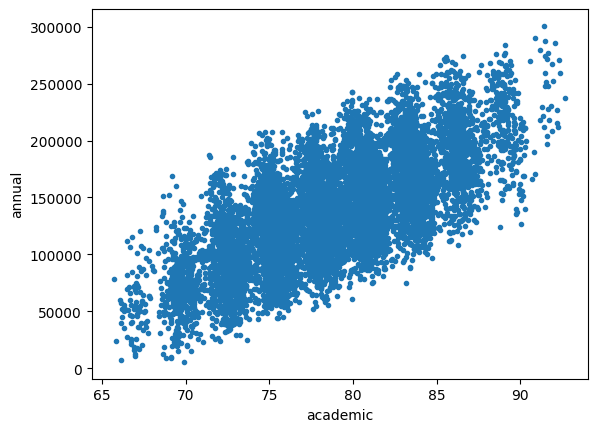

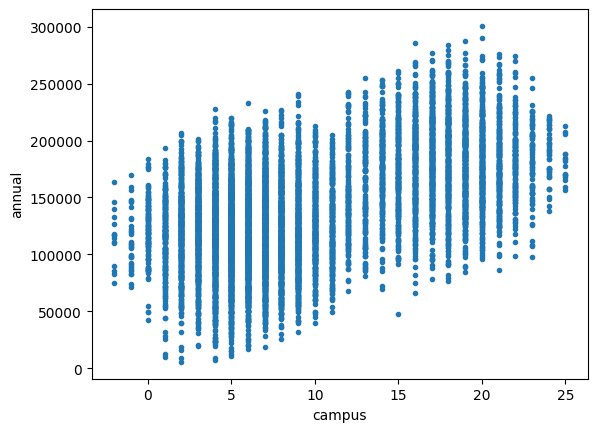

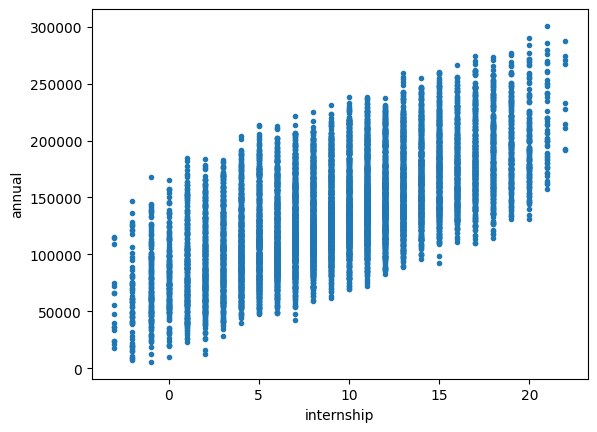

In [23]:
for i in ['academic','campus','internship']:
    plt.figure()
    plt.plot(df[i],df['annual'],'.')
    plt.xlabel(i)
    plt.ylabel('annual')

I'm going to say 'academic' is one of the best attributes

In [24]:
from sklearn.linear_model import LinearRegression
# Initialize instance of linear regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(df[['academic']],df[['annual']])

LinearRegression()

Text(0, 0.5, 'annual')

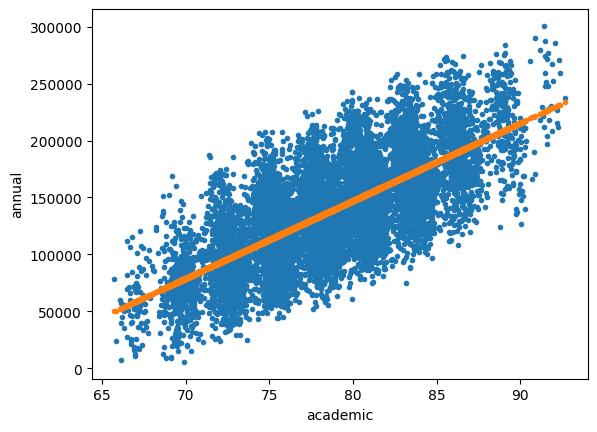

In [25]:
plt.figure()
plt.plot(df['academic'],df['annual'],'.')
plt.plot(df['academic'],linear_reg_model.predict(df[['academic']]),'.',label='Linear Reg Model')
plt.xlabel('academic')
plt.ylabel('annual')

## placement (10 points)
**Choose the best  *ONE* attribute from `'academic'`, `'campus'`, and `'internship'` for predicting how much the annual income a student may have using *simple polynomial regression* with *the regularization terms* of your choice.**

In [26]:
df2 = df.copy()
df2.head()

,Unnamed: 0,id,major,gender,c01,c02,c03,c04,c05,c06,...,AtRisk_academic,AtRisk_campus,AtRisk_internship,AtRisk,graduate_program,goverment,industry,placement,annual,elective
0,0,0,Computer Science,M,75.757576,82.558140,72.674419,63.5,64.981949,77.880184,...,0,0,0,0,0.349878,0.367152,0.321840,1,107617.807100,['Databases' 'Statistical_Inference'\n 'High_P...
1,1,1,Electric Engineering,M,81.818182,90.697674,86.627907,69.5,65.342960,76.036866,...,0,0,0,0,0.480584,0.365623,0.507846,1,119352.387963,['Databases' 'Data_Mining' 'Big_Data' 'Nature_...
2,2,2,Computer Science,M,81.212121,83.139535,67.441860,61.5,67.870036,90.783410,...,0,1,0,1,0.272257,0.091891,0.275136,1,79071.683763,['Text_Marketing_Analysis' 'Databases' 'Stats_...
3,3,3,Computer Science,F,82.424242,85.465116,71.511628,64.0,67.148014,90.322581,...,0,0,0,0,0.471933,0.341157,0.549235,1,166007.658165,['Effective_Communication' 'Data_Structures_an...
4,4,4,Computer Science,M,86.666667,88.372093,75.581395,68.5,72.202166,88.018433,...,0,0,0,0,0.567934,0.445324,0.666711,1,163059.071543,['R_for_Data_Science' 'Databases' 'Machine_Lea...


## placement (10 points)
**Use `'academic'`, `'campus'`, and `'internship'` together for predicting how much the annual income a student may have using *multiple linear regression*.**

In [27]:
mult_lin_reg = LinearRegression()
mult_lin_reg.fit(df[['academic','campus','internship']],df[['annual']])

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mult_pred = mult_lin_reg.predict(df[['academic','campus','internship']])
print()
print('multiple regression model results:')
print('mse = {}'.format(mean_squared_error(df[['annual']],mult_pred)))
print('mae = {}'.format(mean_absolute_error(df[['annual']],mult_pred)))
print('r2 = {}'.format(r2_score(df[['annual']],mult_pred)))


multiple regression model results:
mse = 296647593.02474385
mae = 14885.08475325327
r2 = 0.8638218677932239


I didn't take the time to produce these metric scores for the other regression models, so I don't have much to compare. But in general, I would say an R-squared score >0.8 is not too bad.

# Clustering (20 points)

## K-Means (5 points)
**Use `'c01'`, `'c02'`, ..., `'c10'` and K-Means, cluster similar students to *k* groups. Explain why you choose such a *k*.**

In [29]:
cluster_data = df[['c0{}'.format(i) for i in range(1,10)] + ['c10']]
cluster_data.head()

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,75.757576,82.558140,72.674419,63.5,64.981949,77.880184,82.236842,79.220779,77.570093,83.050847
1,81.818182,90.697674,86.627907,69.5,65.342960,76.036866,78.947368,92.857143,85.046729,82.627119
2,81.212121,83.139535,67.441860,61.5,67.870036,90.783410,88.815789,79.220779,72.429907,88.135593
3,82.424242,85.465116,71.511628,64.0,67.148014,90.322581,91.447368,84.415584,76.168224,89.406780
4,86.666667,88.372093,75.581395,68.5,72.202166,88.018433,91.447368,88.961039,74.299065,84.745763


## DBSCAN (5 points)
**Use `'c01'`, `'c02'`, ..., `'c10'` and *DBSCAN*, cluster similar students to groups. Explain why you choose such epsilon and minpoints.**

## PCA (5 points)
**Use PCA methods to reduce columns `'c01'`, `'c02'`, ..., `'c10'`,`'academic'`, `'campus'`, and `'internship'` to *3 extracted attributes*. Print out the % of explained variance with the 3 extracted features.**

In [30]:
pca_data = df[['c0{}'.format(i) for i in range(1,10)] + ['c10','academic','campus','internship']]

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(pca_data)
X_pca.shape

(10000, 3)

In [32]:
pca.explained_variance_ratio_

array([0.46556569, 0.32223478, 0.11389498])

## PCA (5 points)
**Use PCA methods to reduce columns `'c01'`, `'c02'`, ..., `'c10'`,`'academic'`, `'campus'`, and `'internship'` to *80% explained variance*. Print out the number of extracted features we need.**

In [33]:
pca2 = PCA(0.80)
X_pca2 = pca2.fit_transform(pca_data)
X_pca2.shape

(10000, 3)

In [34]:
pca2.n_components_

3

# Frequent Patterns (10 points)

**There is an attribute `'elective'`. Use *apriori* algorithm, to find the frequent patterns of the elective courses and find the association rules. As the hypterparameter training, you should set the `min_support`, `min_confidence`, and `min_lift` so that your conclusion is interesting.**

In [35]:
fp_data = df['elective']
fp_data.head()

0    ['Databases' 'Statistical_Inference'\n 'High_P...
1    ['Databases' 'Data_Mining' 'Big_Data' 'Nature_...
2    ['Text_Marketing_Analysis' 'Databases' 'Stats_...
3    ['Effective_Communication' 'Data_Structures_an...
4    ['R_for_Data_Science' 'Databases' 'Machine_Lea...
Name: elective, dtype: object

In [36]:
# !pip install apyori
from apyori import apriori

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [37]:
rule = apriori(transactions = fp_data, max_length=2)
result = list(rule)
len(result)

990

In [38]:
result

[RelationRecord(items=frozenset({'\n'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'\n'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({' '}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' '}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({"'"}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'"}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'A'}), support=0.7428, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'A'}), confidence=0.7428, lift=1.0)]),
 RelationRecord(items=frozenset({'B'}), support=0.468, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'B'}), confidence=0.468, lift=1.0)]),
 RelationRecord(items=frozenset({'C'}), support=0.8687, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozen

Okay, for some reason, the data is not separated by commas (and includes other extra stuff like `"\n"` and underscores), and that appears to mess up the apriori algorithm. (I didn't incorporate time to fix that, so this is where I'm going to have to leave it.)

# Outliers (*Optional*)

**Choose one or two attributes, try different methods of detecting outliers. Justify your findings and summarize your experience.**

# Neural Network (*Optional*)

**Choose one or two attributes you like, train a simple and a deep neural network. Compare the result and summarize your experience.**